# Theis-Verfahren
Dieses virtuelle Arbeitsblatt soll Ihnen dabei helfen, folgende Kompetenzen zu erlangen:
- Grundverständnis des Theis-Ansatzes, sodass Sie Ihn in Grundzügen erklären und mit anderen Verfahren instationärer Pumpversuchsauswertung vergleichen können.
- Fähigkeit, die Auswertung nach Theis selbstständig durchführen zu können.
- Fähigkeit zur Bewertung der Qualität von Pumpversuchsauswertungen, die nach Theis durchgeführt wurden.


## Einführung

### Allgemeine Situation
Ein analytischer Ansatz für die radiale Strömung auf einen Brunnen zu wurde von Dupuit-Thiem (1906) für stationäre Verhältnisse entwickelt. Allerdings werden stationäre Verhältnisse bei Pumpversuchen, wenn überhaupt, erst nach sehr langen Pumpzeiten erreicht. Deshalb entwickelte Theis (1935) ein Verfahren für die Auswertung der instationären Brunnenanströmung. Grundlage dafür bietet die Grundwasserströmungsgleichung für instationäre, radiale 1D-Strömung:

$$ \frac{\partial^2 h}{\partial r^2}+\frac{1}{r}\frac{\partial h}{\partial r}=\frac{S}{T}\frac{\partial h}{\partial t} $$

Wobei *h* die __Druckhöhe__, *r* die __Distanz__ des beobachteten Punktes zum Pumpbrunnen und *t* die __Zeit__ seit Beginn des Pumpvorganges repräsentieren. *T* und *S* stehen für die gesuchten Aquifereigenschaften __Transmissivität__ und __Speicherkoeffizient__.
Diese Formel ist vorerst nur für den gespannten Fall und nur unter den folgenden Grundvoraussetzungen gültig:

- homogener und isotroper Aufbau
- ausschließlich horizontale Strömungsprozesse
- konstante Pumprate
- (annähernd) infinite Ausbildung
- vollständig ausgebauter und über die gesamte Länge verfilterter Brunnen
- keine Quellen, keine Senken im Einflussbereich des Brunnens
- höchstens triviale Randbedingungen

### Lösungsansatz nach Theis (1935)
Charles V. Theis entwickelte 1935 einen analytischen Ansatz für die Simulierung dieses instationären Prozesses mithilfe der folgenden Gleichung:

<br>
<center>
$$ \large s(r,t)=\frac{Q}{4\pi T}W(u) $$
</center>
<br>

wobei *Q* und *s* die die Pumprate und die Absenkung im Beobachtungsbrunnen repräsentieren und *W(u)* die _Brunnenfunktion,_ die sich aus folgender Gleichung ergibt:

<br>
<center>
$$ \large W(u) = \int_{u }^{+\infty} \frac{e^{-u}}{u}d u $$
</center>
<br>
    
Der Parameter *u* stellt hierbei eine Hilfsvariable dar, die die gesuchten Parameter *S* und *T*, sowie den Abstand *r* und die Zeit *t* in folgende Abhängigkeit zueinander setzt:

<br>
<center>
$$ \large u = \frac{Sr^2}{4Tt} $$
</center>
<br>
    
Versucht man nun durch die Bildung des Integrals der Funktion $\frac{e^{(-u)}}{u}$ die Brunnenfunktion zu bestimmen, ergibt sich folgendes Bild:

<br>
<center>$\large W(u) = \int_{u }^{+\infty} \frac{e^{-u}}{u}du = -0,5772 - ln(u) + u - $ <font color=blue> $\large \frac{u^2}{2 \cdot 2!} + \frac{u^3}{3 \cdot 3!} - \frac{u^4}{4 \cdot 4!}+...$ </font></center>
<br>

Die sich aus der Bildung des Integrals ergebende unendliche Reihe (blau markiert), macht eine exakte Berechnung der Brunnenfunktion *W(u)* auf analytischem Wege annähernd unmöglich. Deshalb wurde *W(u)* von Theis für bestimmte *u*-Werte annähernd bestimmt und in einer Tabelle aufgetragen, auf die früher zurückgegriffen wurde, als noch keine Computer o.Ä. genutzt werden konnten. Alternativ kann auf Typkurven zurückgegriffen werden, was sich in der Praxis als die nützlichere Lösung erwies. Dieses Verfahren wird in der Folge vorgestellt.

### Berechnung

*Im Folgenden wird das Theis-Verfahren genauer dargestellt. Alle Bereiche, die hierfür von elementarer Wichtigkeit sind, sind schwarz markiert.\
Das grundsätzliche Vorgehen umfasst folgende Schritte:
1. Erstellung einer Typkurve, indem die Brunnenfunktion $W(u)$ gegen das Inverse der Hilfsvariable ($u^{-1}$) geplottet wird. Dabei wird von beiden Funktionen je der Logarithmus zur Basis 10 gebildet (doppellogarithmische Betrachtung). __Die Form dieser Typkurve ist dabei unabhängig von den Eigenschaften des Grundwasserleiters.__
2. Die logarithmierten gemessenen Absenkungen der zum Zeitpunkt $t_i$ in der Messstelle mit der Entfernung $r$ gemessenen Absenkung ( $log(s_i)$ ) werden gegen die logarithmierte Zeit $log (t)$ aufgetragen (ebenfalls doppellogarithmisch)
3. Die Systeme werden so gegeneinander verschoben, dass die Typkurve auf den Messwerte zu liegen kommt. Außerdem wird ein sog. "Match-Point" ausgewählt, um den Versatz der beiden Kurven in x- und y-Richtung zu bestimmen.
4. Bestimmung der Transmissivität mithilfe des Versatzes in y-Richtung
5. Bestimmung des Speicherkoeffizienten mithilfe des Versatzes in x-Richtung. 


<font color=blue>In den blau markierten Bereichen wird darüber hinaus die Struktur der Berechnung und Verwendung der eingelesenen Daten erläutert. Diese Bereiche sind für das Verständnis des Theis-Verfahrens an sich nicht notwendig, allerdings wird es Ihnen helfen, ein besseres Verständnis der computergestützen Auswertung zu entwickeln. In den folgenden Arbeitsblättern werden diese Bereiche nicht mehr explizit getrennt werden. \
<strong>Auf jeden Fall anpassen müssen Sie in der folgenden Box das von Ihnen verwendete Arbeitsverzeichnis <i>"save_dir =('C:/.../')". </i> </strong></font>

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import scipy.special
import os
from ipywidgets import *

#Arbeitsverzeichnis:
save_dir = ('C:/Users/fritz/Documents/Lehre/Jupyter/')

if not os.path.isdir(save_dir):
    os.makedirs(save_dir)


<font color=blue>In den folgenden zwei Boxen werden die im weiteren Verlauf verwendeten Funktionen definiert:</font>

In [4]:
#Define a function, class, and object for Theis Well analysis


def well_function(u):
    return scipy.special.exp1(u)

def theis_u(T,S,r,t):
    u = r ** 2 * S / 4. / T / t
    return u

def theis_s(Q, T, u):
    s = Q / 4. / np.pi / T * well_function(u)
    return s

def theis_wu(Q, T, s):
    wu = s * 4. * np.pi * T / Q
    return wu

def deriv(t, tm, s, sm):
    #d = (s-sm)/(np.log(t)-np.log(tm))
    d=((t+tm)/2)*((s-sm)/(t-tm))
    return d

In [5]:
u_max = 10
r_max = 1000000
u  = [u_max for x in range(r_max)]
um = [u_max for x in range(r_max)]
ump = [u_max for x in range(r_max)]
u_inv  = [r_max/u_max for x in range(r_max)]
um_inv = [r_max/u_max for x in range(r_max)]
w_u  = [well_function(u_max/r_max) for x in range(r_max)]
w_um = [well_function(u_max/r_max) for x in range(r_max)]
w_ump = [well_function(u_max/r_max) for x in range(r_max)]

for x in range(1,r_max,1):
    if x>0:
        u[x] = x*u_max/r_max
        u_inv[x] = 1/u[x]
        w_u[x] = well_function(u[x])

NameError: name 'Q' is not defined

**1. Die Theis'sche Typkurve**\
Mit der nächsten Box wird die __Theis'sche Typkurve__ unter Zuhilfenahme der soeben definierten Funktionen erstellt. Mithilfe __min.__ bzw. __max 1/u__ und __min.__ bzw. __max. W(u)__ kann die Größe des betrachteten Wertebereiches festegelgt werden. Außerdem kann mit __W_a__ und __1/u_a__ die Lage des __"Matching Point"__ gewählt werden, der später zu Hilfe genommen wird, um den Versatz der Kurven zu bestimmmen. Lassen Sie die Werte hier aber vorerst unangetastet. \
Das hier angezeigte Diagramm wird außerdem automatisch als Bilddatei __("Theis-Typkurve.png")__ im zuvor ausgewählten Arbeitsverzeichnis gespeichert.

In [97]:
# W(u) is match_wu and 1/u is match_uinv
def typecurveplot (match_wu, match_u_inv,x_min,x_max,y_min,y_max):
    matchgrid_x=[match_u_inv, match_u_inv]
    matchgrid_y=[match_wu, match_wu]
    matchgrid  =[min(x_min,y_min), max(x_max,y_max)]
    
    fig = plt.figure(figsize=(9,6))
    ax = fig.add_subplot(1, 1, 1)
    plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9)  # adjust plot area

    #plot the data
    ax.plot(u_inv, w_u, color = 'black', linewidth = 2)
    ax.plot(match_u_inv, match_wu,'ro',markersize=6)
    ax.plot(matchgrid_x,matchgrid,color ='lime', linewidth = 1)
    ax.plot(matchgrid,matchgrid_y,color = 'lime', linewidth = 1)

    
    #set up the diagramm
    plt.yscale("log")
    plt.xscale("log")
    plt.axis([x_min,x_max,y_min,y_max])
#    plt.axis([0.1,1E4,1E-2,1E+1])
    ax.set(xlabel='1/u', ylabel='w(u)')
    plt.title('Typkurve nach Theis',fontweight='bold', fontsize=16)
    ax.grid(which="both",color='whitesmoke', linewidth=0.5)

    #box around plot
    ax.spines['top'].set_color('lightgrey')
    ax.spines['bottom'].set_color('lightgrey')
    ax.spines['right'].set_color('lightgrey')
    ax.spines['left'].set_color('lightgrey')

    ax.tick_params(which='both', colors='lightgrey')
    plt.savefig(save_dir+'Theis-Typkurve.png', dpi=300)

interact(typecurveplot,
        x_min = widgets.FloatLogSlider(min=-2, max=2, base=10, value=1e-1, step=1, description='Min. 1/u', continuous_update=False, readout_format='.0e'),
        x_max = widgets.FloatLogSlider(min=2, max=7, base=10, value=1e4, step=1, description='Max. 1/u', continuous_update=False, readout_format='.0e'),
        y_min = widgets.FloatLogSlider(min=-5, max=-1, base=10, value=1e-2, step=1, description='Min W(u)', continuous_update=False, readout_format='.0e'),
        y_max = widgets.FloatLogSlider(min=0, max=2, base=10, value=1e1, step=1, description='Max. W(u)', continuous_update=False, readout_format='.0e'),
        match_u_inv = widgets.FloatLogSlider(value=1,base=10,min=-4, max=6, step=1, description='1/u_a', continuous_update=False, readout_format='.0e'),
        match_wu = widgets.FloatLogSlider(value=1,base=10,min=-4, max=6, step=1, description='W_a', continuous_update=False, readout_format='.0e'))
    

interactive(children=(FloatLogSlider(value=1.0, continuous_update=False, description='W_a', max=6.0, min=-4.0,…

<function __main__.typecurveplot(match_wu, match_u_inv, x_min, x_max, y_min, y_max)>

**2a. Einlesen des Beispieldatensatzes**

Nun lesen wir die Messwerte unseres Beispieldatensatzes ein. Dazu werden zwei Listen für die Zeit und die Absenkung mit der exakt gleichen Anzahl an Elementen für jede beobachtete Messstelle erstellt. Die Werte sind hierbei ordinalskaliert und werden einander durch die Position in der Liste zugeordnet. 

<font color=blue>__*Zur Erläuterung:*__\
*Hier sind sowohl Daten von Varnum (2016), als auch von Fetter (2000) und Schwartz & Zhang (2003) aufgeführt. Alle Zeilen mit dem Symbol **#** zu Beginn stellen Kommentarspalten dar und werden __nicht__ in die Operationen miteinbezogen. Das kann sowohl zur Erläuterung/Markierung gewisser Bereiche genutzt werden als auch zur einfachen "Entfernung" eines Datensatzes aus der Betrachtung, ohne dass er gelöscht werden muss. Wählen Sie einen der anderen Datensatz aus, indem Sie je eine Raute vor die aktuell aktiven **m_time-** und **ddown-**Zeilen setzen und die zwei Rauten bei einem anderen Datensatz löschen.*</font>

In [2]:
#DATA FROM SCHWARTZ & ZHANG (2003)
#Q = 500 m3/d, r = 300 m
Q = 500/86400
r = 300
# time in minutes:
m_time = [1,1.27,1.61,2.04,2.59,3.29,4.18,5.3,6.72,8.53,10.83,13.74,17.43,22.12,28.07,35.62,45.2,57.36,72.79,92.37,117.21,148.74,188.74,239.5,303.92,385.66,489.39,621.02,788.05,1000]
## drawdown in meters:
ddown = [0.03,0.05,0.09,0.15,0.22,0.31,0.41,0.53,0.66,0.8,0.95,1.11,1.27,1.44,1.61,1.79,1.97,2.15,2.33,2.52,2.7,2.89,3.07,3.26,3.45,3.64,3.83,4.02,4.21,4.39]


# DATA VARNUM (2016) (Q = 1138 m3/day)
#R4 => r = 90 m
#m_time = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325] # time in minutes
#m_ddown = [2E-05,0.0303,0.05141,0.0661,0.07509,0.08408,0.09307,0.10115,0.10556,0.10997,0.11162,0.11878,0.12319,0.12577,0.13002,0.13245,0.13396,0.13822,0.14064,0.14307,0.14457,0.147,0.14851,0.14818,0.15108,0.15307,0.15322,0.15612,0.15902,0.161,0.16115,0.16313,0.16328,0.16343,0.16618,0.16618,0.16618,0.16893,0.16893,0.17077,0.17352,0.17077,0.17352,0.17352,0.17614,0.17602,0.17589,0.1776,0.17564,0.17552,0.17722,0.17527,0.17514,0.17685,0.1768,0.1795,0.17945,0.1794,0.18118,0.18113,0.18108,0.18103,0.18098,0.1791,0.17897,0.18068,0.18056,0.18227,0.18214,0.18202,0.18189,0.18177,0.17981,0.18152,0.18179,0.18207,0.18509,0.18262,0.18564,0.18592,0.18344,0.18647,0.18399,0.18427,0.18773,0.18662,0.18733,0.18622,0.18602,0.18673,0.18837,0.18633,0.18613,0.18777,0.18779,0.18782,0.18784,0.18787,0.18789,0.18792,0.18794,0.18797,0.18799,0.18802,0.19092,0.19107,0.19122,0.19137,0.19152,0.19167,0.19182,0.19197,0.19395,0.19227,0.19244,0.19262,0.19279,0.19297,0.19314,0.19332,0.19349,0.19367,0.19384,0.19402,0.19552,0.1952,0.19304,0.19455,0.19422,0.19207,0.19357,0.19325,0.19109,0.1926,0.19257,0.19255,0.19252,0.1925,0.19247,0.19245,0.19242,0.1924,0.19237,0.19235,0.19252,0.1927,0.19562,0.19305,0.19322,0.1934,0.19632,0.1965,0.19392,0.19685,0.19405,0.194,0.19395,0.19665,0.1966,0.19655,0.1965,0.19828,0.1964,0.19635,0.19635,0.19635,0.19818,0.19818,0.19635,0.19818,0.19635,0.19818,0.19818,0.19635,0.19801,0.19783,0.19766,0.19748,0.19731,0.19713,0.19971,0.19953,0.19936,0.19827,0.19661,0.19862,0.19879,0.19897,0.19731,0.19932,0.20041,0.19783,0.19801,0.20002,0.20063,0.19942,0.20003,0.19973,0.19668,0.20188,0.19792,0.19853,0.19823,0.19702,0.19793,0.19793,0.19977,0.19702,0.19793,0.19793,0.19702,0.19518,0.19793,0.19977,0.19808,0.20007,0.19747,0.20037,0.20052,0.19792,0.19898,0.19913,0.19928,0.19943,0.19938,0.19842,0.19837,0.19923,0.19827,0.19913,0.20183,0.19812,0.19898,0.19893,0.19804,0.19807,0.19901,0.19628,0.20181,0.19817,0.20094,0.20097,0.20191,0.20193,0.19953,0.19988,0.19932,0.20242,0.20002,0.20312,0.20072,0.20198,0.20417,0.20543,0.20142,0.20198,0.20347,0.20312,0.20002,0.20242,0.19932,0.19897,0.20137,0.20193,0.20122,0.19867,0.19887,0.19907,0.20293,0.20222,0.19967,0.20262,0.20007,0.20027,0.20376,0.20358,0.20249,0.20232,0.19939,0.20197,0.20179,0.20162,0.20144,0.20402,0.20233,0.20248,0.20263,0.20187,0.20293,0.20033,0.20232,0.20247,0.20262,0.20277,0.20294,0.20312,0.20329,0.20347,0.20364,0.20473,0.20399,0.20417,0.20434,0.20452,0.20159,0.20417,0.20399,0.20382,0.20364,0.2053,0.20512,0.20312,0.20477,0.20277,0.20477,0.20312,0.20329,0.20347,0.20547,0.20382,0.20399,0.20417,0.20617,0.20452,0.20417] # drawdown in meters

#R12 => r = 40 m
#m_time =  [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325] # time in minutes
#m_ddown = [2E-05,0.02022,0.04591,0.0716,0.09342,0.11433,0.12882,0.14332,0.15139,0.16313,0.17396,0.18203,0.18827,0.1936,0.19878,0.2012,0.20729,0.21247,0.21489,0.22007,0.22249,0.22583,0.22826,0.23068,0.23358,0.23648,0.23938,0.24228,0.24243,0.24533,0.24915,0.2493,0.2522,0.25235,0.2551,0.2551,0.25785,0.25785,0.2606,0.2606,0.26335,0.26335,0.2661,0.2661,0.26597,0.26585,0.26847,0.2656,0.26822,0.27177,0.26797,0.27152,0.27139,0.27402,0.27397,0.27392,0.27387,0.27382,0.27652,0.27647,0.27642,0.27637,0.27907,0.27627,0.27614,0.27877,0.27589,0.27577,0.27839,0.27735,0.27814,0.2771,0.28064,0.2796,0.27712,0.2774,0.28042,0.27795,0.27822,0.2785,0.28152,0.27905,0.28207,0.28235,0.28307,0.28012,0.28175,0.2843,0.2841,0.28482,0.28462,0.28442,0.28422,0.28402,0.28404,0.28407,0.28684,0.28412,0.28689,0.28692,0.28694,0.28422,0.28699,0.28702,0.28717,0.28732,0.28747,0.28762,0.28777,0.28792,0.28807,0.28822,0.28837,0.28852,0.29144,0.28887,0.29179,0.28922,0.28939,0.28957,0.28974,0.28992,0.29009,0.29027,0.28994,0.29237,0.28929,0.29172,0.29139,0.29107,0.29074,0.29042,0.29009,0.28977,0.28974,0.28972,0.28969,0.29333,0.28964,0.28687,0.28959,0.29323,0.28954,0.28952,0.29336,0.29353,0.29371,0.29022,0.29406,0.29423,0.29441,0.29458,0.29109,0.29493,0.29488,0.29483,0.29478,0.29473,0.29468,0.29463,0.29458,0.29453,0.29723,0.29718,0.29443,0.29443,0.29443,0.29443,0.29443,0.29718,0.29443,0.29443,0.29443,0.29718,0.29701,0.29683,0.29666,0.29648,0.29631,0.29613,0.29596,0.29578,0.29561,0.29543,0.29561,0.29853,0.29596,0.29613,0.29631,0.29648,0.29666,0.29683,0.29701,0.29993,0.29688,0.29658,0.29628,0.29598,0.29568,0.29538,0.29508,0.29478,0.29723,0.29693,0.29418,0.29418,0.29418,0.29418,0.29693,0.29693,0.29418,0.29418,0.29693,0.29418,0.29433,0.29723,0.29738,0.29478,0.29768,0.29783,0.29798,0.29813,0.29828,0.29843,0.29838,0.29833,0.29828,0.29823,0.29818,0.29813,0.29808,0.29803,0.29798,0.29793,0.29796,0.29798,0.29801,0.29803,0.30081,0.30083,0.29811,0.29813,0.29816,0.30093,0.29853,0.29888,0.29923,0.29958,0.29993,0.30303,0.30338,0.30098,0.30133,0.30168,0.30408,0.30098,0.30063,0.30303,0.29993,0.30233,0.29923,0.29888,0.29853,0.29818,0.30113,0.30133,0.29878,0.29898,0.30193,0.30213,0.30233,0.30253,0.30273,0.30018,0.30001,0.30258,0.30241,0.29948,0.29931,0.29913,0.30171,0.29878,0.29861,0.29843,0.30133,0.29873,0.29888,0.29903,0.29918,0.29933,0.29948,0.29963,0.30253,0.29993,0.30011,0.30028,0.30046,0.30063,0.30081,0.30373,0.30391,0.30133,0.30151,0.30443,0.30151,0.30133,0.30116,0.30098,0.30081,0.30338,0.30046,0.30028,0.30286,0.29993,0.30286,0.30303,0.30321,0.30338,0.30356,0.30373,0.30391,0.30408,0.30426,0.30443,0.30408] # drawdown in meters

#R14 => r = 160 m
#m_time = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325] # time in minutes
#m_ddown = [0.000,0.00739,0.01474,0.02577,0.03568,0.04284,0.04999,0.05349,0.05973,0.06322,0.06671,0.07387,0.07736,0.08085,0.0842,0.08387,0.08629,0.08964,0.09298,0.09265,0.096,0.09934,0.09901,0.09869,0.1025,0.10632,0.10647,0.11029,0.11044,0.11059,0.1144,0.11455,0.1147,0.11485,0.1176,0.1176,0.1176,0.12127,0.12127,0.12127,0.12127,0.12127,0.12494,0.12494,0.12481,0.12469,0.12456,0.1281,0.12431,0.12419,0.12773,0.12394,0.12748,0.12369,0.1273,0.12725,0.1272,0.12715,0.1271,0.12705,0.13067,0.12695,0.13057,0.13052,0.1304,0.13027,0.13015,0.13002,0.1299,0.12977,0.13331,0.13319,0.1294,0.12927,0.12955,0.13349,0.13376,0.13404,0.13064,0.13092,0.13486,0.13514,0.13541,0.13569,0.13549,0.13529,0.13509,0.13489,0.13469,0.13449,0.13429,0.13409,0.13389,0.13369,0.13371,0.1374,0.13743,0.13379,0.13748,0.1375,0.13753,0.13755,0.13758,0.1376,0.13775,0.1379,0.13805,0.1382,0.13835,0.1385,0.14232,0.13514,0.13895,0.1391,0.13928,0.13945,0.13963,0.1398,0.13998,0.14015,0.14033,0.1405,0.14068,0.14085,0.14053,0.1402,0.14354,0.14322,0.14289,0.1389,0.13858,0.14192,0.14159,0.14127,0.14124,0.14122,0.14119,0.14117,0.14114,0.13745,0.13743,0.14107,0.14104,0.14102,0.1412,0.14137,0.14154,0.14172,0.13823,0.14207,0.14225,0.14242,0.13893,0.14277,0.14272,0.14267,0.14262,0.14257,0.13885,0.1388,0.14242,0.14237,0.13865,0.1386,0.1386,0.14227,0.14227,0.14227,0.14227,0.14227,0.14227,0.14227,0.14227,0.14502,0.14209,0.14467,0.14174,0.14157,0.1414,0.14122,0.14379,0.14087,0.14069,0.14052,0.14069,0.14087,0.14104,0.14122,0.14139,0.14157,0.14449,0.14192,0.14484,0.14227,0.14472,0.14167,0.14137,0.14382,0.14352,0.14322,0.14292,0.14262,0.14232,0.13927,0.14202,0.14202,0.14202,0.14202,0.14202,0.14202,0.14202,0.14202,0.14202,0.14202,0.14217,0.14232,0.14247,0.14262,0.14277,0.14292,0.14307,0.14322,0.14337,0.14352,0.14347,0.14342,0.14337,0.14332,0.14327,0.14322,0.14317,0.14679,0.14307,0.14302,0.14304,0.14307,0.14309,0.14312,0.14314,0.14317,0.14319,0.14322,0.14324,0.14327,0.14362,0.14397,0.14432,0.14467,0.14502,0.14537,0.14939,0.14607,0.14642,0.14677,0.14642,0.14607,0.14572,0.14537,0.14502,0.14467,0.14432,0.14397,0.14362,0.14694,0.14347,0.14367,0.14387,0.14407,0.14427,0.14447,0.14467,0.14487,0.14507,0.14894,0.1451,0.14492,0.14474,0.14457,0.14439,0.14789,0.14405,0.14387,0.14369,0.14352,0.14367,0.14382,0.14397,0.14779,0.14427,0.14442,0.14457,0.14472,0.14487,0.14502,0.14886,0.14537,0.14555,0.14572,0.14956,0.14974,0.14625,0.15009,0.15026,0.15044,0.15026,0.15009,0.14625,0.14607,0.14589,0.14572,0.14554,0.14904,0.14886,0.14502,0.1452,0.14537,0.14921,0.14572,0.1459,0.14607,0.14625,0.14642,0.14659,0.14677,0.14642]   # drawdown in meters

#R15 => r = 2,5 m
#m_time = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325] # time in minutes
#m_ddown = [0.04219,0.20264,0.24483,0.26044,0.28501,0.29492,0.30849,0.31657,0.32556,0.33272,0.33988,0.34612,0.35236,0.35769,0.36103,0.36345,0.36588,0.3683,0.37439,0.37407,0.37558,0.38075,0.38409,0.3856,0.38667,0.38957,0.3943,0.39354,0.39644,0.403,0.40315,0.40147,0.40345,0.4036,0.40635,0.4091,0.40635,0.4091,0.4091,0.4091,0.41277,0.41277,0.41277,0.41552,0.41264,0.41527,0.41514,0.41502,0.41764,0.41752,0.41739,0.42094,0.41623,0.41702,0.42064,0.42059,0.42054,0.42324,0.42319,0.4213,0.42309,0.42487,0.42574,0.42294,0.42556,0.42544,0.42531,0.42519,0.42415,0.42677,0.42848,0.42652,0.42823,0.43085,0.43113,0.42865,0.42893,0.4292,0.43223,0.42975,0.43094,0.42847,0.43058,0.43085,0.43157,0.43137,0.433,0.4328,0.43077,0.4324,0.42945,0.432,0.43364,0.43344,0.43438,0.4344,0.43443,0.43445,0.43448,0.43359,0.43361,0.43455,0.43824,0.4346,0.43475,0.43215,0.4323,0.43245,0.43535,0.4355,0.43565,0.43947,0.43595,0.43519,0.43811,0.43829,0.43846,0.43864,0.43881,0.43899,0.43916,0.43934,0.43951,0.43785,0.44119,0.43904,0.43871,0.44114,0.43806,0.44049,0.43741,0.43984,0.43951,0.43919,0.43916,0.43914,0.43911,0.43909,0.43906,0.43904,0.43901,0.43624,0.44263,0.4426,0.44278,0.43929,0.44313,0.4433,0.44348,0.43999,0.44016,0.444,0.44418,0.44069,0.44064,0.44425,0.44237,0.44232,0.43952,0.44222,0.444,0.44395,0.44665,0.44202,0.44202,0.44202,0.44202,0.44477,0.44202,0.44202,0.44477,0.44385,0.44202,0.44385,0.44368,0.44625,0.44608,0.4459,0.44573,0.4428,0.44538,0.4452,0.44228,0.44485,0.44503,0.4452,0.44538,0.4428,0.44573,0.4459,0.44608,0.44625,0.44918,0.4466,0.4463,0.446,0.4457,0.4454,0.44785,0.4448,0.4445,0.4442,0.4439,0.44177,0.44177,0.44177,0.44177,0.44177,0.44177,0.44177,0.44177,0.44177,0.44177,0.44177,0.44375,0.4439,0.44405,0.44695,0.44435,0.44175,0.44465,0.4448,0.44495,0.4451,0.4478,0.44775,0.44495,0.4449,0.44485,0.4448,0.44659,0.4447,0.44465,0.4446,0.44463,0.44465,0.44468,0.44287,0.44473,0.44292,0.44294,0.44297,0.44299,0.44302,0.44337,0.44372,0.44407,0.44442,0.44477,0.44512,0.44547,0.44582,0.44617,0.45019,0.44984,0.44582,0.44547,0.44512,0.44477,0.44442,0.44407,0.44372,0.44337,0.44302,0.44322,0.44342,0.44362,0.44107,0.44402,0.44605,0.44625,0.44645,0.44665,0.44685,0.44668,0.4465,0.44908,0.4489,0.44873,0.44855,0.44563,0.44545,0.44528,0.44785,0.44525,0.4454,0.44555,0.4457,0.44585,0.446,0.44432,0.4463,0.44462,0.4466,0.44494,0.44512,0.4453,0.44547,0.44565,0.44582,0.44599,0.44617,0.44635,0.44377,0.44359,0.44617,0.44599,0.44582,0.44564,0.44547,0.44529,0.44237,0.44494,0.44844,0.44494,0.44512,0.44529,0.44547,0.44565,0.44582,0.44599,0.44342,0.44634,0.44377,0.44617] # drawdown in meters

#B1 => Pumping well
#m_time = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325] # time in minutes
#m_ddown = [1.06975,0.9955,1.034,1.0505,1.067,1.08075,1.08716,1.0945,1.10916,1.10366,1.11741,1.12016,1.12291,1.13116,1.13391,1.13391,1.14491,1.14216,1.15316,1.13941,1.15041,1.15041,1.15041,1.16141,1.15316,1.16141,1.16141,1.15866,1.16416,1.16966,1.16966,1.16966,1.17791,1.17241,1.17516,1.16966,1.17791,1.18066,1.18341,1.17791,1.17791,1.17516,1.17791,1.18341,1.18066,1.18341,1.17791,1.17791,1.18341,1.18341,1.18891,1.18341,1.18616,1.18066,1.18066,1.17791,1.18066,1.18891,1.18616,1.18066,1.18616,1.19166,1.19716,1.19166,1.19166,1.18616,1.19166,1.19716,1.19716,1.19166,1.19991,1.19441,1.19166,1.18891,1.18341,1.19166,1.18891,1.18891,1.19441,1.19716,1.18616,1.19441,1.19166,1.18891,1.18616,1.19166,1.18891,1.19441,1.19166,1.19441,1.19166,1.19441,1.18891,1.19991,1.19991,1.20266,1.20266,1.20633,1.19716,1.19716,1.19991,1.19991,1.19716,1.20266,1.19716,1.19716,1.19991,1.19716,1.19991,1.20633,1.20633,1.20633,1.20266,1.20908,1.21183,1.20908,1.20633,1.20908,1.20908,1.20633,1.20266,1.20633,1.20266,1.20266,1.20633,1.20908,1.21183,1.20908,1.21183,1.21183,1.20908,1.21183,1.20908,1.21183,1.20908,1.20908,1.20908,1.21458,1.20633,1.20908,1.21183,1.21458,1.21183,1.21458,1.21183,1.21733,1.20908,1.20908,1.21458,1.21458,1.21183,1.20908,1.21183,1.21183,1.21183,1.21458,1.21458,1.21183,1.21733,1.21733,1.21458,1.20908,1.21458,1.21733,1.21733,1.21733,1.21733,1.21733,1.21733,1.21458,1.21183,1.21458,1.21458,1.21183,1.21183,1.21733,1.22008,1.20908,1.21458,1.22008,1.21733,1.22008,1.21733,1.22283,1.22283,1.22283,1.22833,1.22008,1.21183,1.21733,1.22008,1.20908,1.21183,1.22008,1.22008,1.22558,1.22558,1.21458,1.21458,1.21733,1.22008,1.21733,1.20908,1.22008,1.21733,1.21733,1.21183,1.21458,1.21733,1.20908,1.21458,1.21183,1.22008,1.20908,1.22008,1.21458,1.22283,1.21733,1.22283,1.22008,1.21733,1.21733,1.22283,1.21458,1.21733,1.22283,1.21183,1.22008,1.21183,1.21733,1.22283,1.21458,1.21183,1.22008,1.21733,1.22283,1.21733,1.21733,1.22283,1.21458,1.21458,1.22283,1.21733,1.22008,1.21733,1.21733,1.22283,1.21733,1.21458,1.22008,1.21183,1.22008,1.21183,1.22833,1.22558,1.22283,1.21733,1.21733,1.22283,1.22008,1.21458,1.22283,1.22008,1.21733,1.21458,1.21458,1.22283,1.21458,1.22008,1.21458,1.21733,1.21733,1.22558,1.22008,1.22008,1.22558,1.22008,1.22008,1.22008,1.21733,1.21458,1.21458,1.22833,1.21183,1.22558,1.21458,1.21733,1.21458,1.21458,1.21733,1.22008,1.21733,1.21733,1.22008,1.22008,1.21733,1.22283,1.22833,1.22008,1.22283,1.22008,1.22833,1.21733,1.22008,1.22283,1.21733,1.22558,1.22558,1.22283,1.21733,1.22833,1.22008,1.22008,1.22558,1.22008,1.22008,1.22283,1.22283,1.21183,1.22558,1.22833,1.21458,1.22558,1.22283,1.22558] # drawdown in meters


# DATA FROM FETTER (2000) (TABLE 5.1),
# Q = 42400 ft3/d, r = 824 ft
#r = 824*0.3048
#Q = 42400*0.3048**3/86400
#m_time = [3,5,8,12,20,24,30,38,47,50,60,70,80,90,100,130,160,200,260,320,380,500] # time in minutes
#ddown = [0.093,0.216,0.401,0.648,0.987,1.110,1.264,1.449,1.573,1.635,1.758,1.881,1.943,2.066,2.159,2.313,2.560,2.621,2.837,2.991,3.146,3.362]   # drawdown in meters

t_max = len(m_time)
d = [0 for x in range(t_max)]

**2b. Auftragung der Messwerte**
Die ausgewählten Messwerte gilt es in einer Form zu plotten, die mit der Theis'schen Typkurve vergleichbar ist. Dazu wird die Absenkung auf einer logarithmischen Skala gegen die logarithmierte Zeit aufgetragen. Mit den Schiebereglern können Sie die Wertebereiche der x- und y-Achse anpassen. Achten Sie darauf, dass diese mit denen der von Ihnen gespeicherten Theis'schen Typkurve identisch sind. Auch die Diagrammgröße _("figsize=(...,...)")_ sollte gleich eingestellt sein. Das angezeigte Diagramm wird ebenfalls im soeben angegebenen Arbeitsverzeichnis gespeichert __("Messwerte.png")__.

In [100]:
#Compute derivatives (hier wird die Änderungsrate ausgerechnet, vorerst noch nicht benötigt)
x = 0
for t in m_time:
    if x > 0:
        d[x] = deriv(m_time[x], m_time[(x-1)], ddown[x], ddown[(x-1)])
    x = x+1

def mcurveplot (x_min,x_max,y_min,y_max):    
    fig = plt.figure(figsize=(9,6))
    ax = fig.add_subplot(1, 1, 1)
    plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9)  # adjust plot area
    ax.plot(m_time, ddown,'bo', markersize=3)

#uncomment to plot derivatives (hiermit kann die Änderungsrate geplottet werden, vorerst noch nicht benötigt)
    #ax.plot(m_time, d,'ro', markersize=3)
    plt.yscale("log")
    plt.xscale("log")

#adjust scales here
    plt.axis([x_min,x_max,y_min,y_max])
    #plt.axis([1,1E3,1E-1,1E0])
    ax.set(xlabel='Zeit t [s]', ylabel='Absenkung s (m)')
    plt.title('Messwerte',fontweight='bold', fontsize=16)
    ax.grid(which="both", color='grey',linewidth=0.5)
    plt.savefig(save_dir+'Messwerte.png', transparent='true', dpi=300)
#plt.show()
#display('Messwerte.png')
interact(mcurveplot,
        x_min = widgets.FloatLogSlider(min=-2, max=2, base=10, value=1e-1, step=1, description='Min. t', continuous_update=False, readout_format='.0e'),
        x_max = widgets.FloatLogSlider(min=2, max=7, base=10, value=1e4, step=1, description='Max. t', continuous_update=False, readout_format='.0e'),
        y_min = widgets.FloatLogSlider(min=-5, max=-1, base=10, value=1e-2, step=1, description='Min s', continuous_update=False, readout_format='.0e'),
        y_max = widgets.FloatLogSlider(min=0, max=2, base=10, value=1e1, step=1, description='Max. s', continuous_update=False, readout_format='.0e'))


interactive(children=(FloatLogSlider(value=0.1, continuous_update=False, description='Min. t', max=2.0, min=-2…

<function __main__.mcurveplot(x_min, x_max, y_min, y_max)>

**3. Verschneidung der Messwerte mit der Typkurve**\
Vergleichen Sie die beiden Abbildungen, die Sie jetzt in Ihrem Arbeitsverzeichnis vorfinden. Sie werden feststellen, dass sich beide Kurven im Verlauf sehr ähneln, auch wenn die Achsenbeschriftungen (und die dahinterliegenden Größen) komplett unverwandt scheinen. \
Laden Sie die beiden Dateien in ein Programm, dass eine Überlagerung der beiden Abbildungen ermöglicht (Inkscape, LibreOffice Writer/Calc, Microsoft Word/Escel, o.Ä.) und versuchen Sie die beiden Bilder so lange gegeneinander zu verschieben, __bis die Typkurve möglichst passgenau den Verlauf der Messwerte nachzeichnet__.\
Der __Matchpoint__ wurde in Schritt 1 bereits in die Typkurvenabbildung eingezeichnet. Nun lesen Sie den x- und y-Wert ab, den der Matchpoint auf dem Messwerte-Datenblatt annehmen würde. Als Ergebnis sollten Sie einen __Absenkungs-Wert ($s_a$)__ und einen __Zeitwert ($t_a$)__ erhalten. Falls der Matching Point außerhalb des Wertebereiches der Messwerte liegt, passen Sie ihn an und erstellen Sie das Diagramm erneut (Schritt 1 wiederholen).

**4. Bestimmung der Transmissivität**
Die Transmissivität kann nun mithilfe folgender Formel und der y-Koordinate des Matchpoints auf dem Typkurven- ($W_a$) und auf dem Messwerte-Diagramm ($s_a$) bestimmt werden. Die Pumprate ($Q$) sollte bei den Datensätzen angegeben sein.

<br>
<center>$\large {T = \frac{Q \cdot W_a}{4 \cdot \pi \cdot s_a}}$ </center>
<br>

Bestimmen Sie die Transmissivität und tragen Sie sie hier ein:

In [91]:
T = 1.5E-3 # m²/s

**5. Bestimmung des Speicherkoeffizienten**
Der Speicherkoeffizient kann nun ebenfalls bestimmt werden. Dazu wird die soeben bestimmte Transmissivität *T*, und die x-Koordinate des Matchpoints auf Typkurven- ($\frac{1}{u_a}$) und Messwertediagramm ($t_a$) benötigt. $r$ stellt die Absenkung der Messstelle zum Pumpbrunnen dar, der bei den Messdaten angegeben sein sollte.

<br>
<center>$\large {S = \frac{4 \cdot t_a}{r^2 \cdot \frac{1}{u_a}}}$ </center>
<br>

Berechnen Sie den Speicherkoeffizienten und tragen Sie ihn hier ein:

In [104]:
S = 1E-5 # m²/s

0.013896230272000001
251.1552


**Überprüfung der Ergebnisse** \
Im nachfolgenden Plot werden die eben von Ihnen eingegebenen Werte für Transmissivität und Speicherkoeffizient mit dem Messstellenabstand und der Pumprate verrechnet und erneut mit der Theis'schen Typkurve abgeglichen. Für wie gut halten Sie die Übereinstimmung? Wodurch könnten Abweichungen bedingt sein?

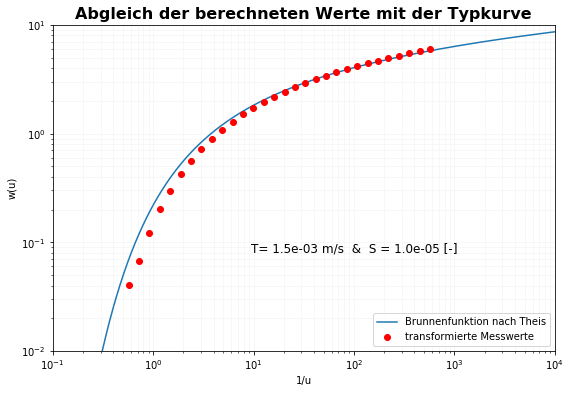

In [102]:
#GENERATE THE TYPE CURVE AND PLOT THE MEASURED DATA

x = 0
for t in m_time:
    um[x] = theis_u(T,S,r,t*60)
    um_inv[x] = 1/um[x]
    w_um[x] = theis_wu(Q,T,ddown[x])
    x = x+1

fig = plt.figure(figsize=(9,6))
ax = fig.add_subplot(1, 1, 1)
ax.plot(u_inv, w_u)
ax.plot(um_inv, w_um,'ro')

plt.yscale("log")
plt.xscale("log")
plt.axis([1e-1,1e4,1e-2,10])
plot_text = "T= " + str('{:.1e}'.format(T))+ " m/s  &  S = " + str('{:.1e}'.format(S))+" [-]"
plt.text(100, 0.1,plot_text,horizontalalignment='center',verticalalignment='top',multialignment='center', size='12')
ax.set(xlabel='1/u', ylabel='w(u)')
plt.title('Abgleich der berechneten Werte mit der Typkurve',fontweight='bold', fontsize=16)
ax.grid(which="both",color='whitesmoke')
plt.legend(('Brunnenfunktion nach Theis','transformierte Messwerte'), loc=4)
plt.savefig(save_dir+'Datenabgleich.png', dpi=300)
plt.show()
